In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})


In [6]:
#read in training file as pandas df
df = pd.read_csv('train.csv', sep=',')

#create the arrays of cat or dog vs age and outcome
feature = 'AgeuponOutcome'
feature_values_dog = np.array(df.loc[df['AnimalType']== 'Dog', feature])
outcome_dog = np.array(df.loc[df['AnimalType']== 'Dog', 'OutcomeType'])

feature_values_cat = np.array(df.loc[df['AnimalType']== 'Cat', feature])
outcome_cat = np.array(df.loc[df['AnimalType']== 'Cat', 'OutcomeType'])

In [12]:
#convert age to days using fx
#make it a string 
i=0
j=0
def age_to_days(item):
    if type(item) is str:
        item = [item]
    ages_in_days = np.zeros(len(item))
    #check if item[i] is in str
    if type(item[i]) is str:
        if 'day' in item[i]:
            ages_in_days[i] = int(item[i].split(' ')[0])
        if 'week' in item[i]:
            ages_in_days[i] = int(item[i].split(' ')[0])*7
        if 'month' in item[i]:
            ages_in_days[i] = int(item[i].split(' ')[0])*30
        if 'year' in item[i]:
            ages_in_days[i] = int(item[i].split(' ')[0])*365
        else:
            #item[i] is NaN
            ages_in_days[i] = 0
    return ages_in_days

In [15]:
#using fx, calc fractions of the outcomes
ages_dog = age_to_days(feature_values_dog)
ages_cat = age_to_days(feature_values_cat)

unique_ages = np.unique(np.append(ages_dog, ages_cat))
unique_outcome = np.unique(np.append(outcome_dog, outcome_cat))

fractions_cat = np.zeros([len(unique_ages), len(unique_outcome)])
fractions_dog = np.zeros([len(unique_ages),len(unique_outcome)])
nr_animals_with_age_dog = np.zeros(len(unique_ages))
nr_animals_with_age_cat = np.zeros(len(unique_ages))

for i in range(len(unique_ages)):
    for j in range(len(unique_outcome)):
        sublist_dog = outcome_dog[ages_dog == unique_ages[i]]
        if len(sublist_dog)>0:
            fractions_dog[i,j] = 1e0*len(sublist_dog[sublist_dog == unique_outcome[j]])/ len(sublist_dog)
        else:
            fractions_dog[i,j] = 0e0
        sublist_cat = outcome_cat[ages_cat == unique_ages[i]]
        fractions_cat[i,j] = 1e0*len(sublist_cat[sublist_cat == unique_outcome[j]])/ len(sublist_cat)
        fractions_cat[i,j] = 0e0 
    
    nr_animals_with_age_dog[i] = len(sublist_dog)
    nr_animals_with_age_cat[i] = len(sublist_cat)

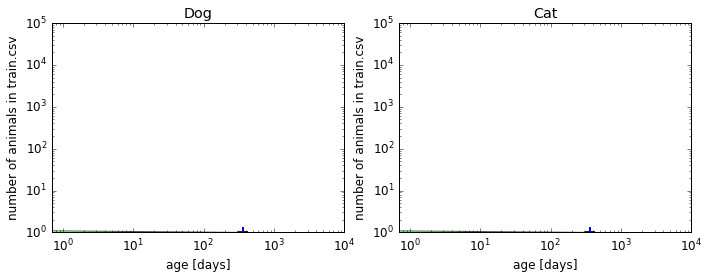

In [19]:
#plotting!
#nr animals vs age
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Dog')
plt.plot(unique_ages,nr_animals_with_age_dog,'+',markersize=10,mew=2)
plt.plot(unique_ages,nr_animals_with_age_dog)
plt.xlim([0.7,1e4])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('age [days]')
plt.ylabel('number of animals in train.csv')
plt.tight_layout(w_pad=0, h_pad=0)

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.plot(unique_ages,nr_animals_with_age_cat,'+',markersize=10,mew=2)
plt.plot(unique_ages,nr_animals_with_age_cat)
plt.xlim([0.7,1e4])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('age [days]')
plt.ylabel('number of animals in train.csv')
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('age-vs-nr_points.jpg',dpi=150)
plt.show()
plt.close()

In [20]:
#defo something wrong here

In [23]:
# fraction of outcomes

ages_for_axis = np.append(unique_ages,age_to_days('20 years'))

left = (ages_for_axis[1:-1] + ages_for_axis[:-2])/2e0
right = (ages_for_axis[1:-1] + ages_for_axis[2:])/2e0
width = right-left

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title('Dog')
plt.xlabel('age [days]')
plt.ylabel('fraction outcomes')
plt.xscale('log')
plt.xlim([0.7,1e4])
plt1 = plt.bar(left, fractions_dog[1:,0], width,color='#5A8F29',edgecolor='none')
plt2 = plt.bar(left, fractions_dog[1:,1], width,color='k',bottom = np.sum(fractions_dog[1:,:1],axis=1),edgecolor='none')
plt3 = plt.bar(left, fractions_dog[1:,2], width,color='#FF8F00',bottom = np.sum(fractions_dog[1:,:2],axis=1),edgecolor='none')
plt4 = plt.bar(left, fractions_dog[1:,3], width,color='#FFF5EE',bottom = np.sum(fractions_dog[1:,:3],axis=1),edgecolor='none')
plt5 = plt.bar(left, fractions_dog[1:,4], width,color='#3C7DC4',bottom = np.sum(fractions_dog[1:,:4],axis=1),edgecolor='none')
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.tight_layout(w_pad=0, h_pad=0)
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()
plt.tight_layout(w_pad=0, h_pad=0)

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.xlabel('age [days]')
plt.ylabel('fraction outcomes')
plt.xscale('log')
plt.xlim([0.7,1e4])
plt1 = plt.bar(left, fractions_cat[1:,0], width,color='#5A8F29',edgecolor='none')
plt2 = plt.bar(left, fractions_cat[1:,1], width,color='k',bottom = np.sum(fractions_cat[1:,:1],axis=1),edgecolor='none')
plt3 = plt.bar(left, fractions_cat[1:,2], width,color='#FF8F00',bottom = np.sum(fractions_cat[1:,:2],axis=1),edgecolor='none')
plt4 = plt.bar(left, fractions_cat[1:,3], width,color='#FFF5EE',bottom = np.sum(fractions_cat[1:,:3],axis=1),edgecolor='none')
plt5 = plt.bar(left, fractions_cat[1:,4], width,color='#3C7DC4',bottom = np.sum(fractions_cat[1:,:4],axis=1),edgecolor='none')
plt.legend([plt1,plt2,plt3,plt4,plt5],unique_outcomes,loc=2,fontsize=10)
plt.tight_layout(w_pad=0, h_pad=0)
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('age-vs-outcome.jpg',dpi=150)
plt.show()
plt.close()

IndexError: list index out of range